# __Regresión Logística__

En este ejemplo utilizaremos la regresión logística para predecir si un estudiante será admitido a la Universidad a partir del resultado de dos exámenes. Para esto, la Universidad ha proporcionado el histórico de los resultados. Nuestro objetivo es estimar si un nuevo estudiante será admitido o no a la universidad a partir de los resultados obtenidos en los dos examenes de admisión.

## __Obteniendo los datos__

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/Logistic%20Regression/ex2data1.txt', header=None)
data.columns=['exam-1', 'exam-2', 'admitted']
data.head(10)

,exam-1,exam-2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


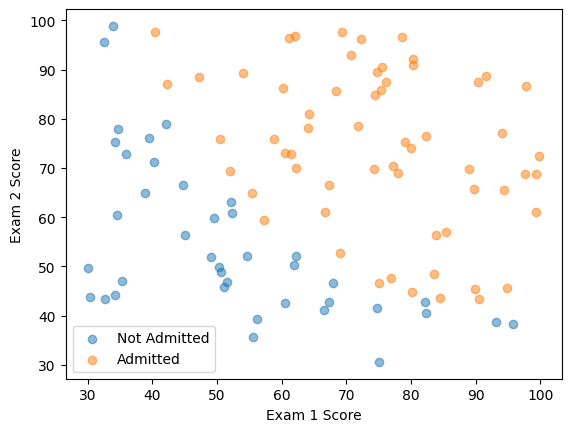

In [4]:
# @title Exam 1 vs Exam 2 by Admission Status

import matplotlib.pyplot as plt
plt.scatter(data[data['admitted'] == 0]['exam-1'], data[data['admitted'] == 0]['exam-2'], alpha=0.5, label='Not Admitted')
plt.scatter(data[data['admitted'] == 1]['exam-1'], data[data['admitted'] == 1]['exam-2'], alpha=0.5, label='Admitted')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
_ = plt.legend()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   exam-1    100 non-null    float64
 1   exam-2    100 non-null    float64
 2   admitted  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
data.describe()

,exam-1,exam-2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


## __Exploración inicial__

Podemos generar un histograma de frecuencias para verificar la distribución de las variables

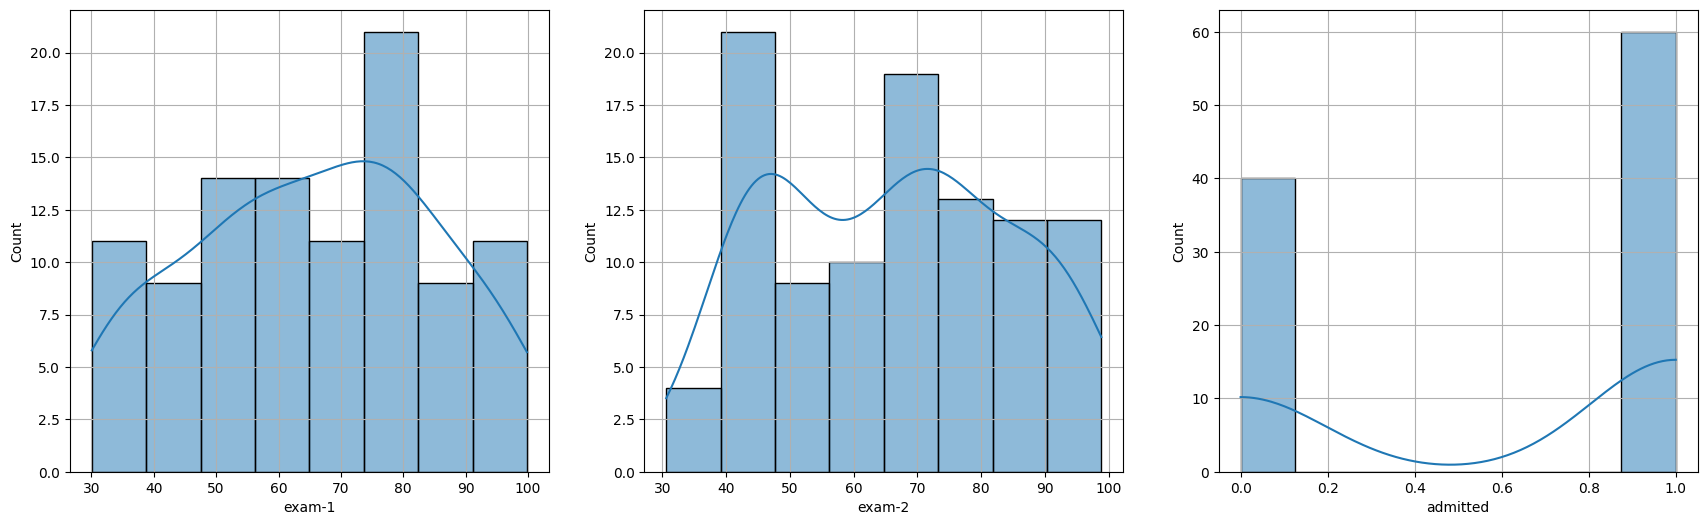

In [7]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(21,6)
for i, column in enumerate(data.columns):
  sns.histplot(data[column], kde=True, ax=axes[i])
  axes[i].grid()

Generamos un diagrama de dispersión

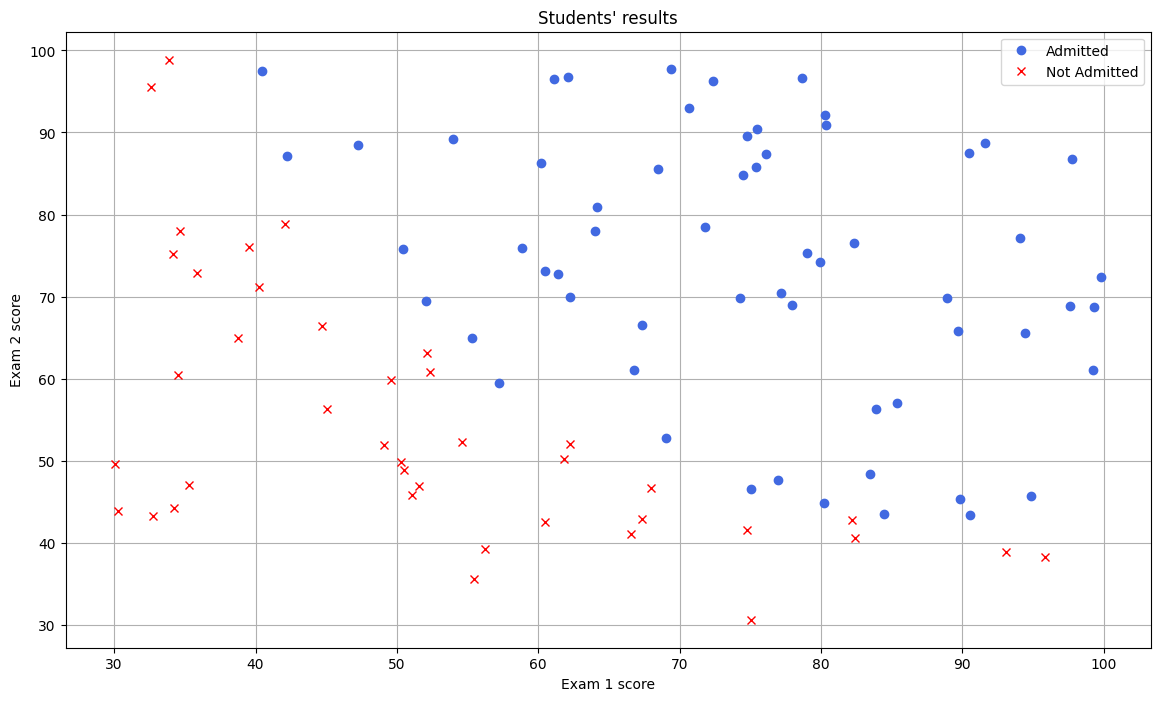

In [8]:
admmited = data[data.admitted == 1]
not_admmited = data[data.admitted == 0]

plt.figure(figsize=(14, 8))
plt.plot(admmited['exam-1'].values, admmited['exam-2'].values, linestyle='', marker='o', color='royalblue', label='Admitted')
plt.plot(not_admmited['exam-1'].values, not_admmited['exam-2'].values, linestyle='', marker='x', color='r', label='Not Admitted')
plt.title("Students' results")
plt.legend()
plt.grid()
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

Identificando posibles valores atípicos

<Axes: >

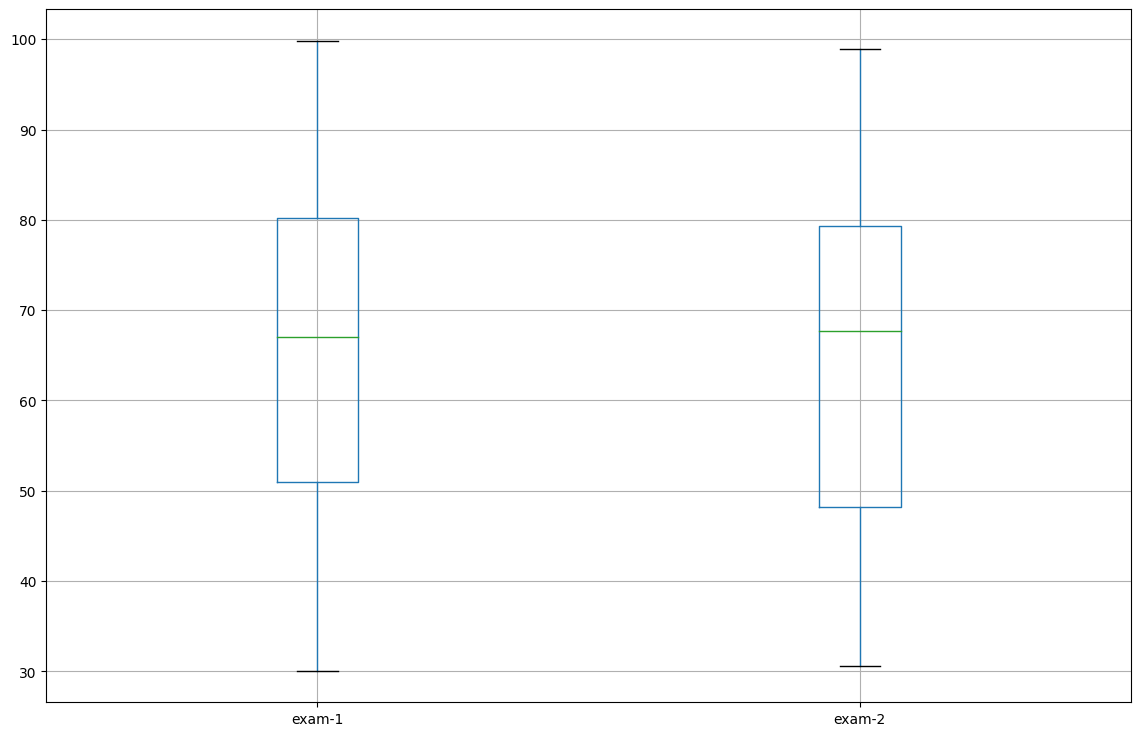

In [9]:
data[['exam-1','exam-2']].boxplot(figsize=(14,9))

<Axes: >

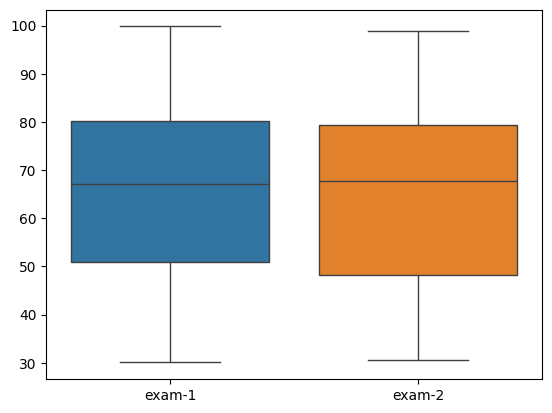

In [10]:
sns.boxplot(data[['exam-1','exam-2']])

## __Generando datos de prueba y entrenamiento__

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
        data.drop(columns='admitted'), data.admitted, test_size =0.3, random_state=0)

## __Entrenando el modelo__

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

classifier = Pipeline([('scaler', StandardScaler()),
                       ('logistic Regession', LogisticRegression())])


classifier.fit(xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic Regession', LogisticRegression())])

## __Evaluación del modelo__
Para evaluar el modelo podemos generar de manera automática todas las métricas vistas durante la clase

###  __Matriz de confusión__
Para evaluar el modelo lo primero es generar la matriz de confusión

In [13]:
from sklearn.metrics import confusion_matrix

ypred = classifier.predict(xtest)
conf_matrix = confusion_matrix(ytest, ypred)

print ("Confusion Matrix: \n", conf_matrix)

Confusion Matrix: 
 [[11  0]
 [ 3 16]]


Podemos genearr una representación a través de un mapa de calor

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

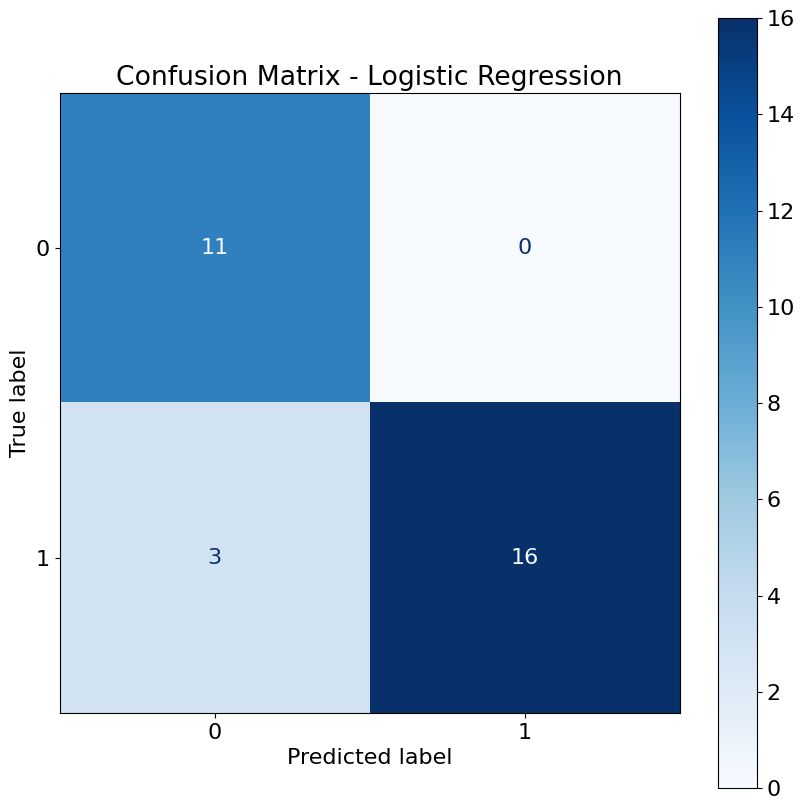

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay.from_estimator(classifier,
                                             xtest,
                                             ytest,
                                             display_labels=classifier.classes_,
                                             cmap=plt.cm.Blues,
                                             ax=axes
                                             )
disp.ax_.set_title('Confusion Matrix - Logistic Regression')

### __Métricas de desempeño__
También podemos generar todas las métrocas de desempeño vistas en clase utilizando Sklearn.

In [15]:
from sklearn.metrics import classification_report
target_names = ['Not Admited', 'Admitted']
print(classification_report(ytest, ypred, target_names=target_names))

              precision    recall  f1-score   support

 Not Admited       0.79      1.00      0.88        11
    Admitted       1.00      0.84      0.91        19

    accuracy                           0.90        30
   macro avg       0.89      0.92      0.90        30
weighted avg       0.92      0.90      0.90        30



Al revisar estas métricas podemos ver que nuestro modelo tiene un desempeño aceptable. Adicionalmente es posible verificar los valores de probabilidad asignados a cada uno de los elementos del conjunto de prueba

In [16]:
y_predicted = classifier.predict(xtest)
y_predicted[:5]

array([1, 0, 0, 0, 1])

In [17]:
y_prob = classifier.predict_proba(xtest)
y_prob[:5]

array([[0.49683121, 0.50316879],
       [0.6093986 , 0.3906014 ],
       [0.83930285, 0.16069715],
       [0.82775982, 0.17224018],
       [0.00909694, 0.99090306]])

### __Visualizando el límite de decisión__

Para visualizar los límites de decisión podemos utilizar las siguientes funciones. (También podremos utilizar estos métodos con otros algoritmos de clasificación)

In [18]:
def make_meshgrid(X, y, step=.02):
    x = X.iloc[:,0]
    y = X.iloc[:,1]
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    return xx, yy

def plot_contours(ax, clf, X, y, **params):
    xx, yy = make_meshgrid(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    ax.scatter(X.iloc[:,0], X.iloc[:,1], c=y.values, cmap=plt.cm.coolwarm, s=100, edgecolors='k')
    ax.set_ylabel(X.columns[1])
    ax.set_xlabel(X.columns[0])
    ax.set_title(clf.__class__.__name__)
    plt.grid()
    out = ax.contourf(xx, yy, Z, **params)
    return out

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


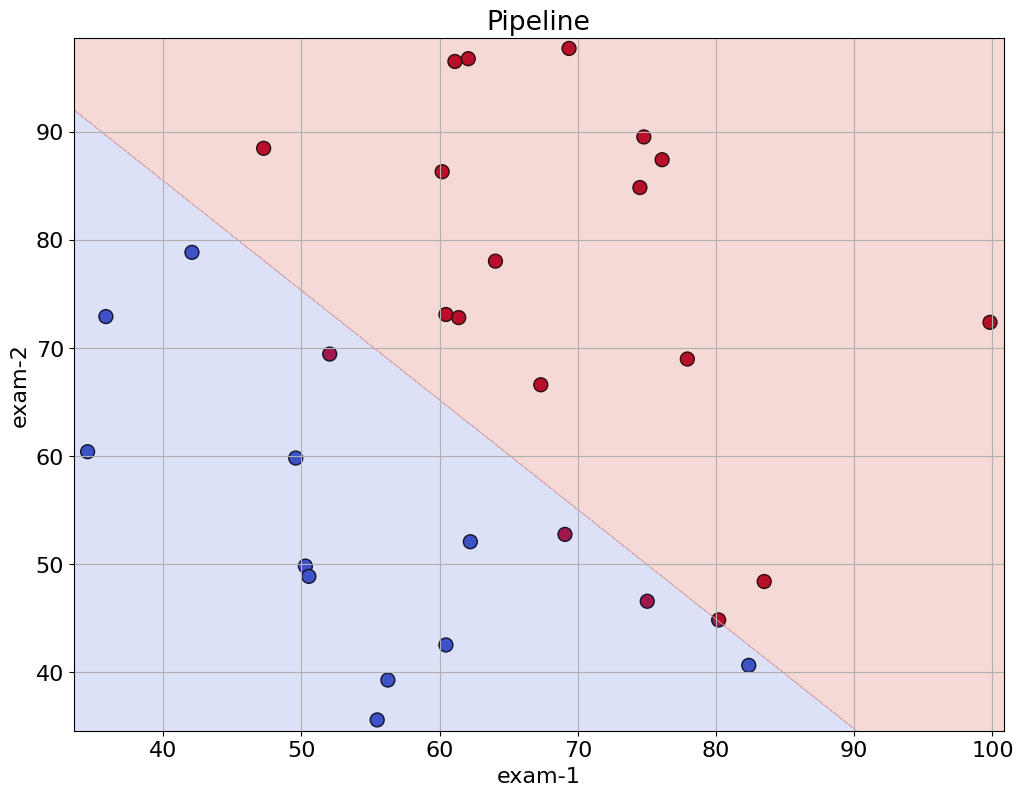

In [19]:
fig, ax = plt.subplots(figsize=(12,9))

X, y = xtest, ytest
plot_contours(ax, classifier, X, y, cmap=plt.cm.coolwarm, alpha=0.2)
plt.show()

### __ROC y AUC__

Podemos generar la curva ROC y el valor de AUC para completar la evaluación de nuestro clasificador

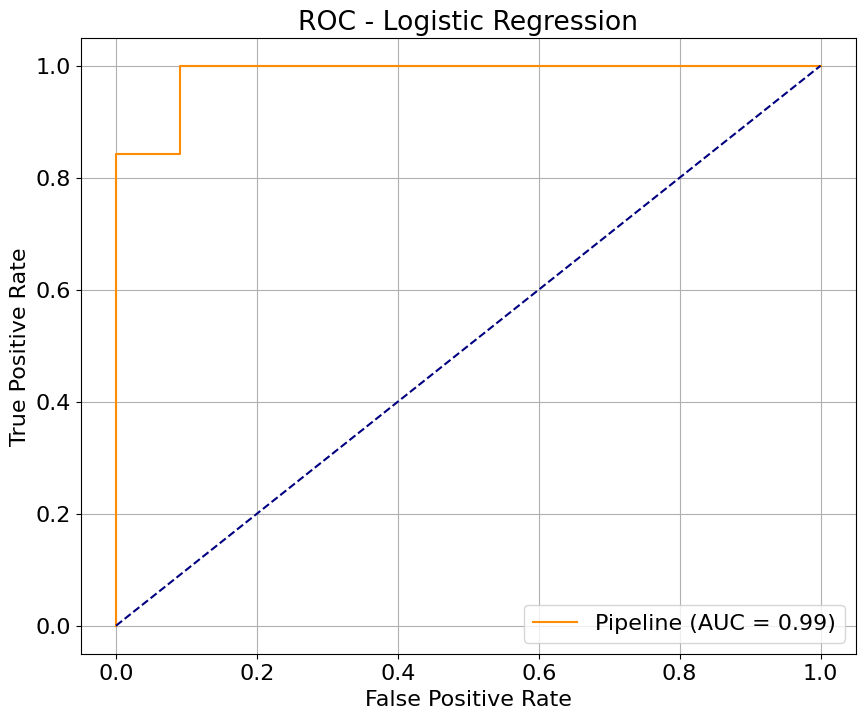

In [20]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()
fig.set_size_inches(10,8)
RocCurveDisplay.from_estimator(classifier, xtest, ytest, ax=ax, color="darkorange")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - Logistic Regression")
plt.grid()
plt.show()

# __Regularización__

Para este ejemplo construiremos un clasificador que tiene como propósito soportar en el proceso de aseguramiento de la calidad en la fabricación de microships. Suponga que usted es el encargado de calidad en una fábrica y desea determinar si un microship debería ser aceptado o no con base a los resultados de dos pruebas.

## __Obteniendo los datos__

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/Logistic%20Regression/ex2data2.txt', header=None)
data.columns=['test1', 'test2', 'accepted']
data.head(10)

,test1,test2,accepted
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
5,-0.524770,0.209800,1
6,-0.398040,0.034357,1
7,-0.305880,-0.192250,1
8,0.016705,-0.404240,1
9,0.131910,-0.513890,1


In [ ]:
X = data[['test1', 'test2']]
Y = data['accepted']

## __Exploración inicial__

Podemos generar un histograma de frecuencias para verificar la distribución de las variables

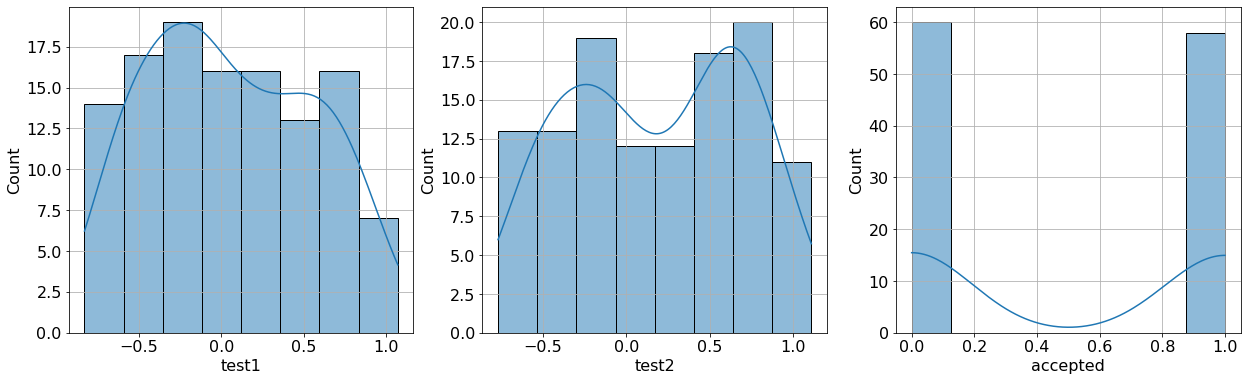

In [ ]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(21,6)
for i, column in enumerate(data.columns):
  sns.histplot(data[column], kde=True, ax=axes[i])
  axes[i].grid()

In [ ]:
import matplotlib.pyplot as plt

def plot_data(X, y):
    pos = np.argwhere(y == 1)
    neg = np.argwhere(y == 0)

    plt.plot(X[pos, 0], X[pos, 1], linestyle='', marker='o', color='royalblue')
    plt.plot(X[neg, 0], X[neg, 1], linestyle='', marker='x', color='r')

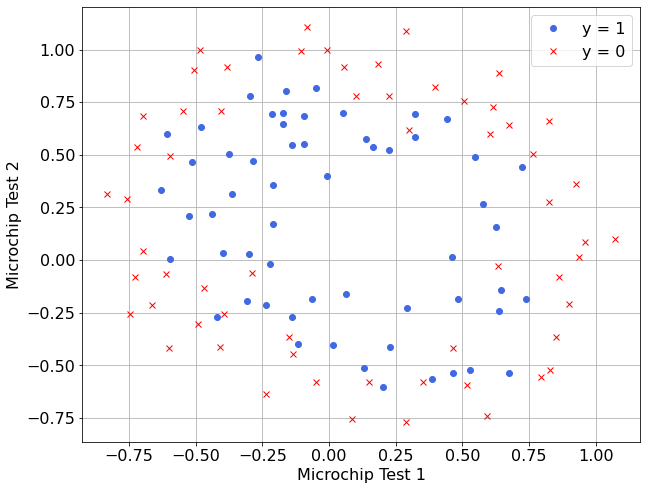

In [ ]:
plt.figure(figsize=(10,8))
plot_data(X.values, Y.values)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'], loc='upper right', numpoints=1)
plt.grid()
plt.show()

Al verificar la distribución de los datos podemos concluir que es poco probable obtener un buen resultado mediante un clasificador lineal.

## __Un ejemplo de overfitting__

Como alternativa podemos agregar nuevas características a nuestros datos utilizando el método `PolynomialFeatures`. En este caso intentaremos ajustar un polinomio de grado $21$ y deshabilitaremos la regularización (por defecto *L2*) y de esta manera observar un caso de sobreajuste

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pol_degree = 25

polinomio = PolynomialFeatures(degree=pol_degree)
X_pol = polinomio.fit_transform(X)

classifier = Pipeline([('scaler', StandardScaler()),
                       ('logistic Regession', LogisticRegression(random_state=1, penalty='none', max_iter=2000))])

classifier.fit(X_pol, Y)

y_pol_pred = classifier.predict(X_pol)

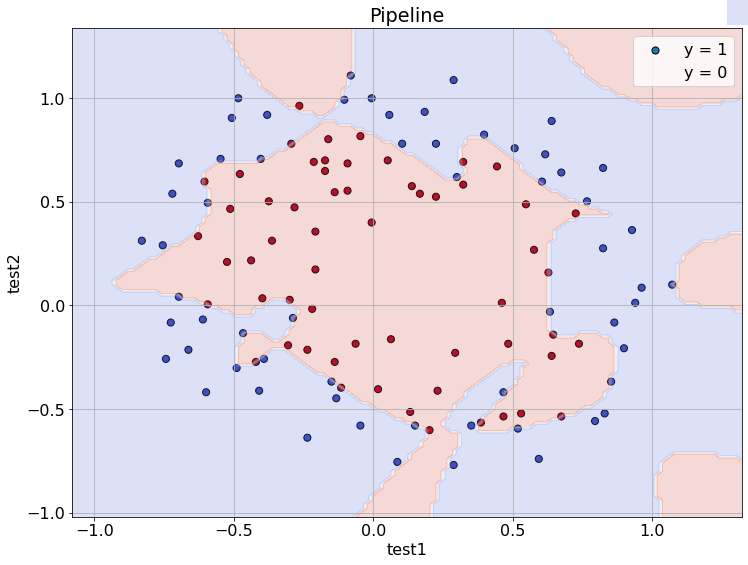

In [ ]:
fig, ax = plt.subplots(figsize=(12,9))
step= 0.02
x = X['test1']
y = X['test2']
x_min, x_max = x.min() - 0.25, x.max() + 0.25
y_min, y_max = y.min() - 0.25, y.max() + 0.25

xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

polinomio = PolynomialFeatures(degree=pol_degree)
X_pol = polinomio.fit_transform((np.c_[xx.ravel(), yy.ravel()]))

Z = classifier.predict(X_pol)
Z = Z.reshape(xx.shape)
ax.scatter(X.iloc[:,0], X.iloc[:,1], c=data.iloc[:,2], cmap=plt.cm.coolwarm, s=50, edgecolors='k')
ax.set_ylabel(X.columns[1])
ax.set_xlabel(X.columns[0])
ax.set_title(classifier.__class__.__name__)
plt.grid()
xx.shape
ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)
plt.legend(['y = 1', 'y = 0'], loc='upper right', numpoints=2)

## __Utilizando Regularización__

Realizando exactamente el mismo proceso, pero habilitando la regularización obtendremos el siguiente resultado.

In [ ]:
polinomio = PolynomialFeatures(degree=pol_degree)
X_pol = polinomio.fit_transform(X)

classifier = Pipeline([('scaler', StandardScaler()),
                       ('logistic Regession', LogisticRegression(C=0.1))])

classifier.fit(X_pol, Y)

y_pol_pred = classifier.predict(X_pol)

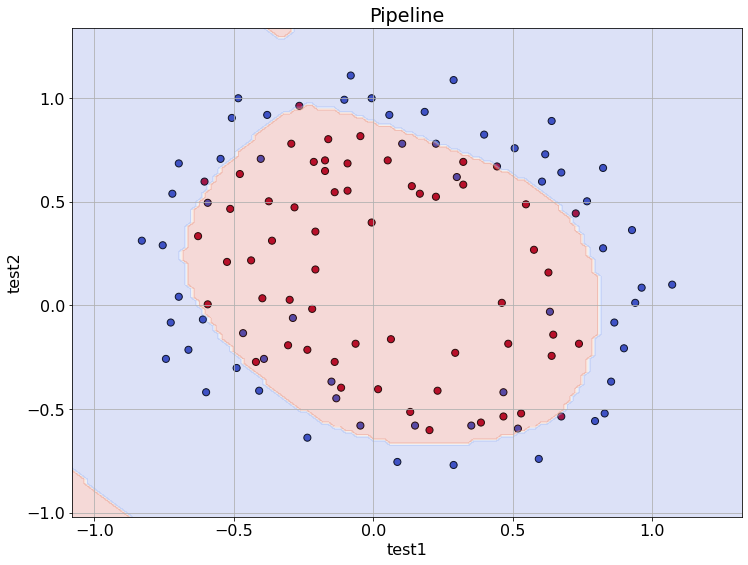

In [ ]:
fig, ax = plt.subplots(figsize=(12,9))
step= 0.02
x = X['test1']
y = X['test2']
x_min, x_max = x.min() - 0.25, x.max() + 0.25
y_min, y_max = y.min() - 0.25, y.max() + 0.25

xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

polinomio = PolynomialFeatures(degree=pol_degree)
X_pol = polinomio.fit_transform((np.c_[xx.ravel(), yy.ravel()]))

Z = classifier.predict(X_pol)
Z = Z.reshape(xx.shape)
ax.scatter(X.iloc[:,0], X.iloc[:,1], c=data.iloc[:,2], cmap=plt.cm.coolwarm, s=50, edgecolors='k')
ax.set_ylabel(X.columns[1])
ax.set_xlabel(X.columns[0])
ax.set_title(classifier.__class__.__name__)
plt.grid()
xx.shape
ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)

## __Un ejemplo de underfitting__

Si ajustamos el proceso de entrenamiento con un parámetro de regularización para que tenga mucha importancia en el proceso de entrenamiento, podríamos generar un caso de underfitting

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pol_degree = 28

polinomio = PolynomialFeatures(degree=pol_degree)
X_pol = polinomio.fit_transform(X)


classifier = Pipeline([('scaler', StandardScaler()),
                       ('logistic Regession', LogisticRegression(random_state = 1, C=0.0005, max_iter=5000))])

classifier.fit(X_pol, Y)

y_pol_pred = classifier.predict(X_pol)

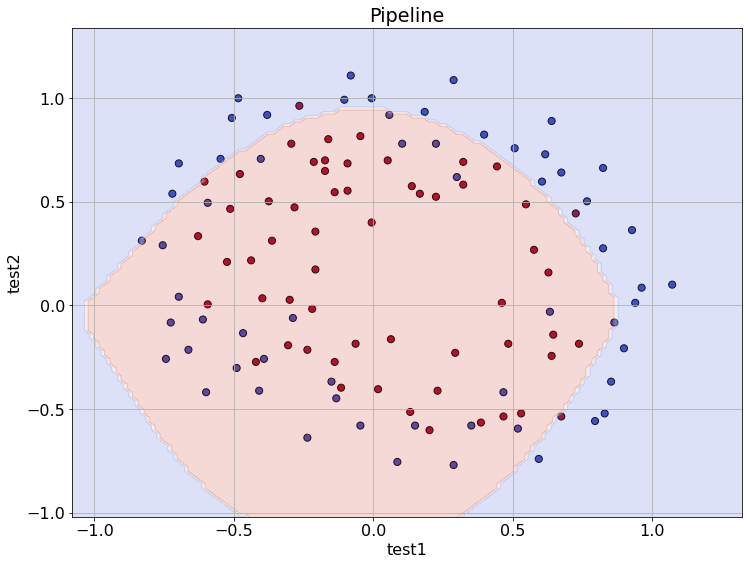

In [ ]:
fig, ax = plt.subplots(figsize=(12,9))
step= 0.02
x = X['test1']
y = X['test2']
x_min, x_max = x.min() - 0.25, x.max() + 0.25
y_min, y_max = y.min() - 0.25, y.max() + 0.25

xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

polinomio = PolynomialFeatures(degree=pol_degree)
X_pol = polinomio.fit_transform((np.c_[xx.ravel(), yy.ravel()]))

Z = classifier.predict(X_pol)
Z = Z.reshape(xx.shape)
ax.scatter(X.iloc[:,0], X.iloc[:,1], c=data.iloc[:,2], cmap=plt.cm.coolwarm, s=50, edgecolors='k')
ax.set_ylabel(X.columns[1])
ax.set_xlabel(X.columns[0])
ax.set_title(classifier.__class__.__name__)
plt.grid()
xx.shape
ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)